## Data Acquisition and Initial Exploration

* Importing libraries
* loading the dataset
* Understanding the German Credit Dataset
* Understand the structure, data types and potential missing values
* Key variables found
* Perform initial descriptive statistics and visualizations.
    * Histogram for numerical data
    * Bar plots for categorical data.



In [2]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
german_bank = pd.read_csv("..\data\german_credit_data.csv")
german_bank.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
german_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
german_bank.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Exploratory Data Analysis (EDA)

In [13]:
# making a copy of the main dataset to begin EDA 
german_eda = german_bank.copy()

# checking for missing values 
german_eda.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [10]:
# removing indexing column

german_eda.drop('Unnamed: 0', axis=1, inplace=True)

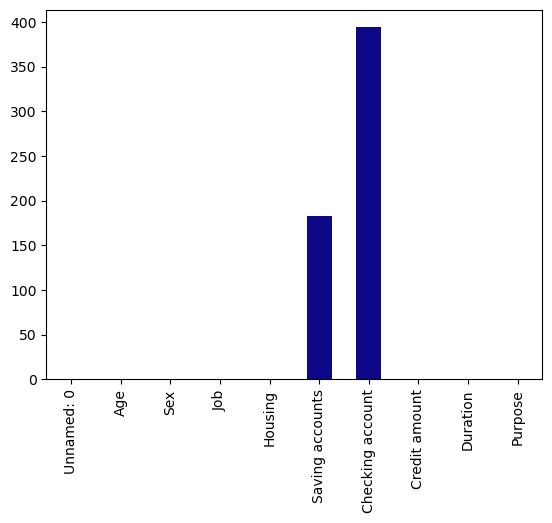

In [14]:
# Null/Missing values 

null_values = german_eda.isnull().sum()

# plotting null values 
null_values.plot(kind='bar', cmap = 'plasma')
plt.show()


In [15]:
# Value Counts of Data 

sex_counts = german_eda['Sex'].value_counts()
job_counts = german_eda['Job'].value_counts()
housing_counts = german_eda['Housing'].value_counts()
saving_counts = german_eda['Saving accounts'].value_counts()
checking_counts = german_eda['Checking account'].value_counts()
purpose_counts = german_eda['Purpose'].value_counts()

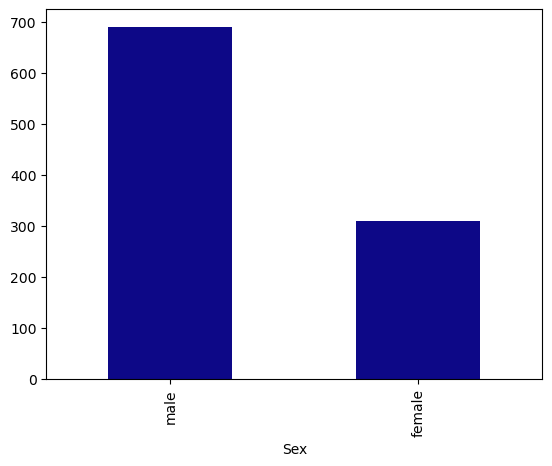

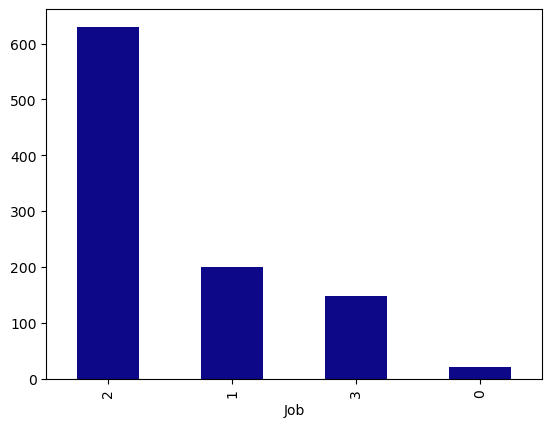

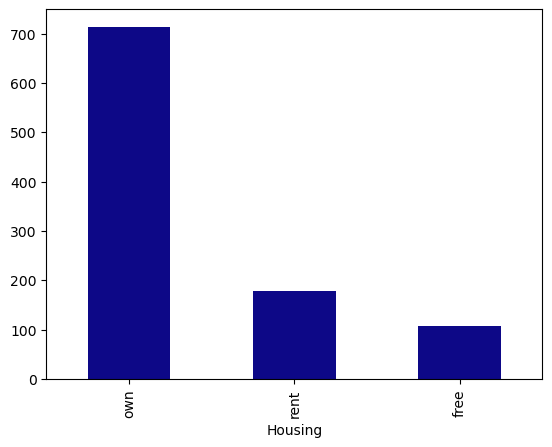

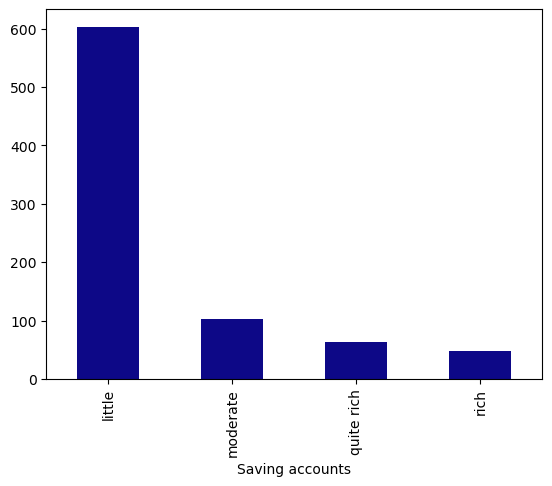

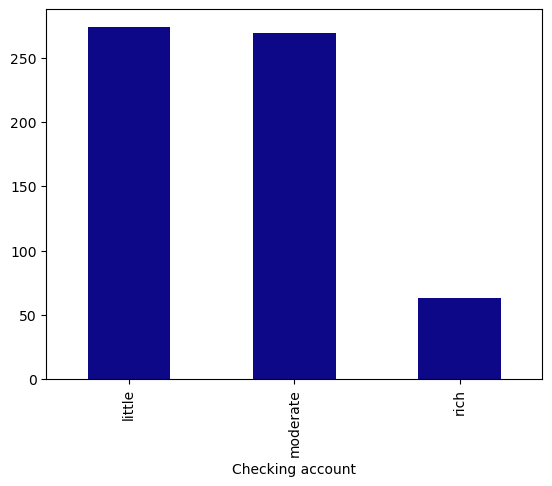

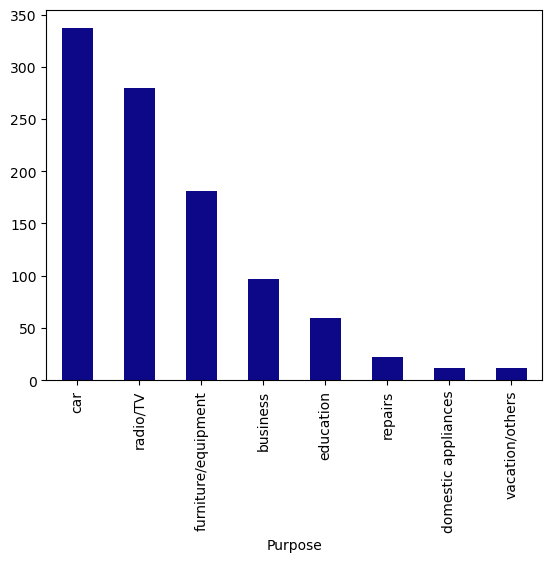

In [16]:
value_counts_data = [sex_counts, job_counts,housing_counts, saving_counts, checking_counts, purpose_counts]

for count_data in value_counts_data:
    count_data.plot(kind='bar', cmap='plasma')
    plt.show()

## Visualizing and Replacing Null values in Savings Account and Checking Account

* Saving Account

In [17]:
german_eda['Saving accounts'].isna().value_counts()

Saving accounts
False    817
True     183
Name: count, dtype: int64

In [23]:
savings_job = german_eda.groupby(['Saving accounts', 'Job']).size().unstack()

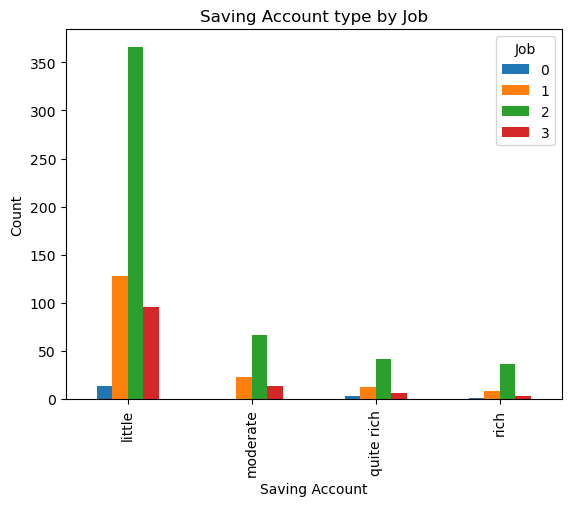

In [24]:
# saving account vs job 
savings_job.plot(kind='bar')
plt.title('Saving Account type by Job')
plt.xlabel('Saving Account')
plt.ylabel('Count')
plt.show()

In [25]:
# saving account vs house 
savings_house = german_eda.groupby(['Saving accounts', 'Housing']).size().unstack()

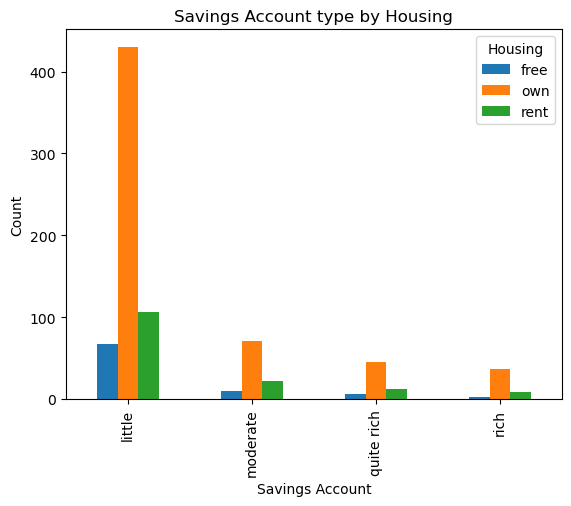

In [26]:
savings_house.plot(kind='bar')
plt.title('Savings Account type by Housing')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.show()

In [28]:
# savings accounts vs credit 
savings_credit = german_eda.groupby(['Saving accounts', 'Checking account']).size().unstack()

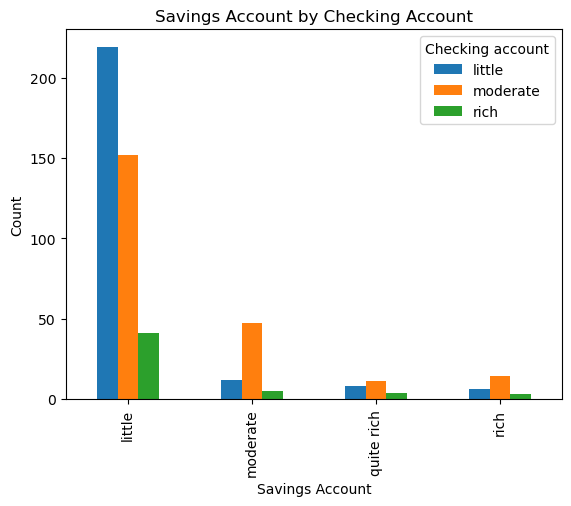

In [29]:
savings_credit.plot(kind='bar')
plt.title('Savings Account by Checking Account')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.show()

In [30]:
german_eda['Saving accounts'].fillna('little', inplace=True)

* Checking account


In [31]:
checking_job = german_eda.groupby(['Checking account', 'Job']).size().unstack()

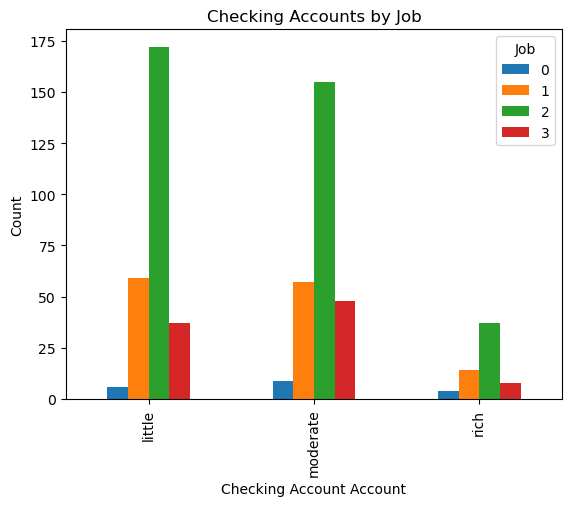

In [32]:
checking_job.plot(kind='bar')
plt.title('Checking Accounts by Job')
plt.xlabel('Checking Account Account')
plt.ylabel('Count')
plt.show()

In [34]:
# checking accounts vs housing 
checking_house = german_eda.groupby(['Checking account', 'Housing']).size().unstack()

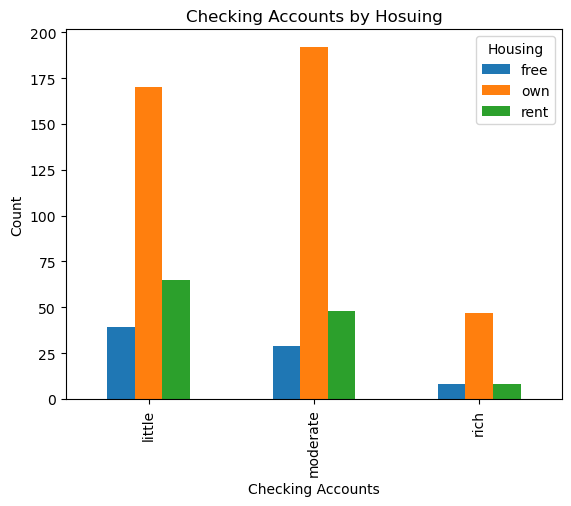

In [35]:
checking_house.plot(kind='bar')
plt.title('Checking Accounts by Hosuing')
plt.xlabel('Checking Accounts')
plt.ylabel('Count')
plt.show()

In [36]:
german_eda.drop('Checking account', axis=1, inplace=True) 

In [37]:
german_eda.isna().sum()

Unnamed: 0         0
Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64